# FEATURE ENGINEERING OPERATIONS - {"RED WINE QUALITY" DATASET}

## 1. Importing Modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [2]:
# PD Options

pd.set_option('display.min_rows', 5)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 4)

In [3]:
# SB Options

sb.set_theme(context='notebook', style='whitegrid', palette='pastel', font='times new roman', font_scale=1.25)

## 2. Importing Dataset

### 2.1 Train Dataset

In [4]:
tr = pd.read_pickle('wine_quality_PP_prod_train.pkl')

print(f'Shape of the train dataset : {tr.shape}')
tr.head(5)

Shape of the train dataset : (1259, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1328,6.7,0.670,0.02,1.9,0.061,26.0,42.0,0.9949,3.39,0.82,10.9,6
1014,8.8,0.955,0.05,1.8,0.075,5.0,19.0,0.9962,3.30,0.44,9.6,4
1318,7.1,0.680,0.00,2.3,0.087,17.0,26.0,0.9978,3.45,0.53,9.5,5
392,11.9,0.390,0.69,2.8,0.095,17.0,35.0,0.9994,3.10,0.61,10.8,6
1264,7.1,0.220,0.49,1.8,0.039,8.0,18.0,0.9934,3.39,0.56,12.4,6


In [5]:
Xtr = tr.drop(columns='quality')
ytr = tr['quality']

### 2.2 Test Dataset

In [6]:
te = pd.read_pickle('wine_quality_PP_prod_test.pkl')

print(f'Shape of the test dataset : {te.shape}')
te.head(5)

Shape of the test dataset : (100, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
37,8.8,0.61,0.30,2.8,0.088,17.0,46.0,0.9976,3.26,0.51,9.3,4
639,9.0,0.46,0.23,2.8,0.092,28.0,104.0,0.9983,3.10,0.56,9.2,5
1137,7.5,0.51,0.02,1.7,0.084,13.0,31.0,0.9954,3.36,0.54,10.5,6
1064,7.1,0.60,0.01,2.3,0.079,24.0,37.0,0.9951,3.40,0.61,10.9,6
473,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.0008,2.86,0.79,8.4,6


## 3. Feature Engineering Process

### 3.1 Binning / Binarization of Target Feature (y)

#### 3.1.1 Train Dataset

In [7]:
ytr = ytr.apply(lambda x: 1 if x>=6 else 0)
ytr = ytr.astype('category')

  quality  count
0       1    667
1       0    592


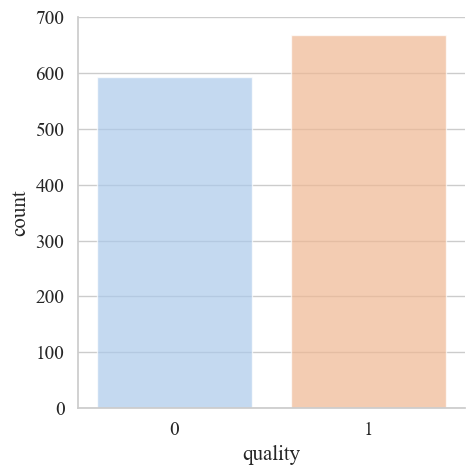

In [8]:
cnt_tr = ytr.value_counts().reset_index()
print(cnt_tr)
sb.catplot(data=cnt_tr, x='quality', y='count', kind='bar', alpha=0.7)

#### 3.1.2 Test Dataset

In [9]:
te['quality'] = te['quality'].apply(lambda x: 1 if x>=6 else 0)
te['quality'] = te['quality'].astype('category')

  quality  count
0       1     52
1       0     48


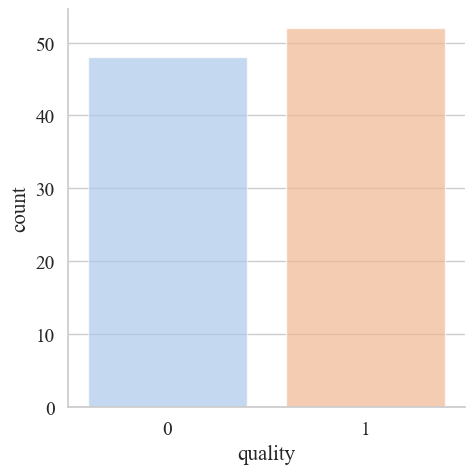

In [10]:
cnt_te = te['quality'].value_counts().reset_index()
print(cnt_te)
sb.catplot(data=cnt_te, x='quality', y='count', kind='bar', alpha=0.7)

##### Saving Production Test CSV File and Pickle Files, after outlier detection and handling step

In [11]:
te.to_csv('wine_quality_FE_prod_test.csv', index=False)
te.to_pickle('wine_quality_FE_prod_test.pkl')

### 3.2 Handling Class Imbalance of Target using SMOTE Oversampling Technique

In [12]:
Ximb = Xtr
Yimb = ytr

Ximb.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1328,6.7,0.670,0.02,1.9,0.061,26.0,42.0,0.9949,3.39,0.82,10.9
1014,8.8,0.955,0.05,1.8,0.075,5.0,19.0,0.9962,3.30,0.44,9.6
1318,7.1,0.680,0.00,2.3,0.087,17.0,26.0,0.9978,3.45,0.53,9.5
392,11.9,0.390,0.69,2.8,0.095,17.0,35.0,0.9994,3.10,0.61,10.8
1264,7.1,0.220,0.49,1.8,0.039,8.0,18.0,0.9934,3.39,0.56,12.4


In [13]:
Yimb.head()

1328    1
1014    0
1318    0
392     1
1264    1
Name: quality, dtype: category
Categories (2, int64): [0, 1]

In [14]:
sm = SMOTE(random_state=46)

Xtr, ytr = sm.fit_resample(Ximb,Yimb)

In [15]:
Xtr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.7,0.670,0.02,1.9,0.061,26.0,42.0,0.9949,3.39,0.82,10.9
1,8.8,0.955,0.05,1.8,0.075,5.0,19.0,0.9962,3.30,0.44,9.6
2,7.1,0.680,0.00,2.3,0.087,17.0,26.0,0.9978,3.45,0.53,9.5
3,11.9,0.390,0.69,2.8,0.095,17.0,35.0,0.9994,3.10,0.61,10.8
4,7.1,0.220,0.49,1.8,0.039,8.0,18.0,0.9934,3.39,0.56,12.4


In [16]:
ytr.head()

0    1
1    0
2    0
3    1
4    1
Name: quality, dtype: category
Categories (2, int64): [0, 1]

Class Distribution after Balancing : 

  quality  count
0       0    667
1       1    667


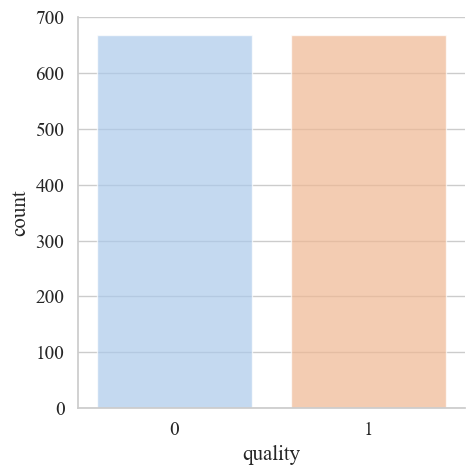

In [17]:
print(f'Class Distribution after Balancing : \n')

ytr.value_counts()
cnt_tr = ytr.value_counts().reset_index()
print(cnt_tr)
sb.catplot(data=cnt_tr, x='quality', y='count', kind='bar', alpha=0.7)

### 3.3 Outliers Detection (IQR) and Handling (Capping)
##### - Outlier detection and handling is applied only on training data.
##### - Operation is not applied on the validation and test data, to avoid the changes in the data. Considering that the prediction is applied on individual basis, one at a time. So, no point of finding IQR and applying capping. 

In [18]:
def outliers_detect_handle(df):
     
    fea_flo = df.select_dtypes(include='float').columns.values.tolist()
    fea_int = df.select_dtypes(include='int').columns.values.tolist()

    fea_num = fea_flo + fea_int
    fea_num
    
    # OUTLIER DETECTION CODE ----------------------------------------------------------------------------------------------
    
    for fea in fea_num:
      
        print(f'Outlier Detection for Feature : {fea} \n')

        mn = df[fea].min()
        mx = df[fea].max()
        print(f'Minimum Value : {mn} and Maximum Value : {mx} \n')

        q1,q3 = df[fea].quantile([0.25,0.75])         #  for 1st and 3rd quartile
        print(f'1st Quartile : {q1} and 3rd Quartile : {q3} \n')

        lb = round(q1 - (q3-q1)*1.5,4)
        ub = round(q3 + (q3-q1)*1.5,4)
        print(f'Lower Bound : {lb} and Higher Bound : {ub} \n')

        filtl = df[fea] < lb
        out_low = df[filtl]
        print(f'No. of Outliers below Lower Bound ({lb}) are : {out_low.shape[0]}')

        filtu = df[fea] > ub
        out_high = df[filtu]
        print(f'No. of Outliers above Upper Bound ({ub}) are : {out_high.shape[0]}')

        out_df = df[(filtl | filtu)]
        print(f'Total No. of Outliers are : {out_df.shape[0]} \n')

        per = (out_df.shape[0]/df[fea].shape[0])*100
        print(f'Percentage of Outliers Records are : {round(per,4)} % \n\n')

        plt.figure(figsize=(15,5))
        plt.subplot(2,2,1)
        plt.title('KDE Plot Before')
        sb.kdeplot(data=df, x=fea)

        plt.subplot(2,2,2)
        plt.title('BOX Plot Before')
        sb.boxplot(data=df, x=fea)

        # OUTLIER HANDLING USING CAPPING TECHNIQUE -----------------------------------------------------------------------------
        df.loc[filtl,fea] = lb                        
        df.loc[filtu,fea] = ub

        # OUTLIER DETECTION CODE -----------------------------------------------------------------------------------------------
        filtl = df[fea] < lb
        out_low = df[filtl]
        print(f'No. of Outliers below Lower Bound ({lb}) are : {out_low.shape[0]}')

        filtu = df[fea] > ub
        out_high = df[filtu]
        print(f'No. of Outliers above Upper Bound ({ub}) are : {out_high.shape[0]}')

        out_df = df[(filtl | filtu)]
        print(f'Total No. of Outliers are : {out_df.shape[0]} \n')

        per = (out_df.shape[0]/df[fea].shape[0])*100
        print(f'Percentage of Outliers Records are : {round(per,4)} %')

        plt.subplot(2,2,3)
        plt.title('KDE Plot After')
        sb.kdeplot(data=df, x=fea)

        plt.subplot(2,2,4)
        plt.title('BOX Plot After')
        sb.boxplot(data=df, x=fea)

        plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.8)
        plt.show()

        print('\n\n\n\n')
    
    return df

In [19]:
#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

In [20]:
fea_flo = Xtr.select_dtypes(include='float').columns.values.tolist()
fea_int = Xtr.select_dtypes(include='int').columns.values.tolist()

fea_num = fea_flo + fea_int
fea_num

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [21]:
Xtr.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000
mean,8.3043,0.5327,0.2709,2.5067,0.0886,15.8727,47.1925,0.9967,3.3083,0.6584,10.3906
std,1.6953,0.1818,0.1944,1.3043,0.0500,10.4456,33.7230,0.0018,0.1534,0.1719,1.0780
min,4.6000,0.1200,0.0000,0.9000,0.0120,1.0000,6.0000,0.9901,2.7400,0.3300,8.4000
25%,7.1000,0.3900,0.1000,1.9000,0.0700,7.0000,22.0000,0.9957,3.2100,0.5500,9.5000
50%,7.9000,0.5200,0.2600,2.2000,0.0790,13.9720,38.0000,0.9968,3.3100,0.6200,10.1000
75%,9.1000,0.6400,0.4200,2.6000,0.0910,21.0000,63.0000,0.9978,3.4000,0.7282,11.0917
max,15.9000,1.3300,1.0000,15.4000,0.6110,72.0000,289.0000,1.0037,4.0100,2.0000,14.9000


In [22]:
# Outlier Detect and Handle Code
Xtr_out = Xtr.copy() 
Xtr_out.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000
mean,8.3043,0.5327,0.2709,2.5067,0.0886,15.8727,47.1925,0.9967,3.3083,0.6584,10.3906
std,1.6953,0.1818,0.1944,1.3043,0.0500,10.4456,33.7230,0.0018,0.1534,0.1719,1.0780
min,4.6000,0.1200,0.0000,0.9000,0.0120,1.0000,6.0000,0.9901,2.7400,0.3300,8.4000
25%,7.1000,0.3900,0.1000,1.9000,0.0700,7.0000,22.0000,0.9957,3.2100,0.5500,9.5000
50%,7.9000,0.5200,0.2600,2.2000,0.0790,13.9720,38.0000,0.9968,3.3100,0.6200,10.1000
75%,9.1000,0.6400,0.4200,2.6000,0.0910,21.0000,63.0000,0.9978,3.4000,0.7282,11.0917
max,15.9000,1.3300,1.0000,15.4000,0.6110,72.0000,289.0000,1.0037,4.0100,2.0000,14.9000


Outlier Detection for Feature : fixed acidity 

Minimum Value : 4.6 and Maximum Value : 15.9 

1st Quartile : 7.1 and 3rd Quartile : 9.1 

Lower Bound : 4.1 and Higher Bound : 12.1 

No. of Outliers below Lower Bound (4.1) are : 0
No. of Outliers above Upper Bound (12.1) are : 42
Total No. of Outliers are : 42 

Percentage of Outliers Records are : 3.1484 % 


No. of Outliers below Lower Bound (4.1) are : 0
No. of Outliers above Upper Bound (12.1) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


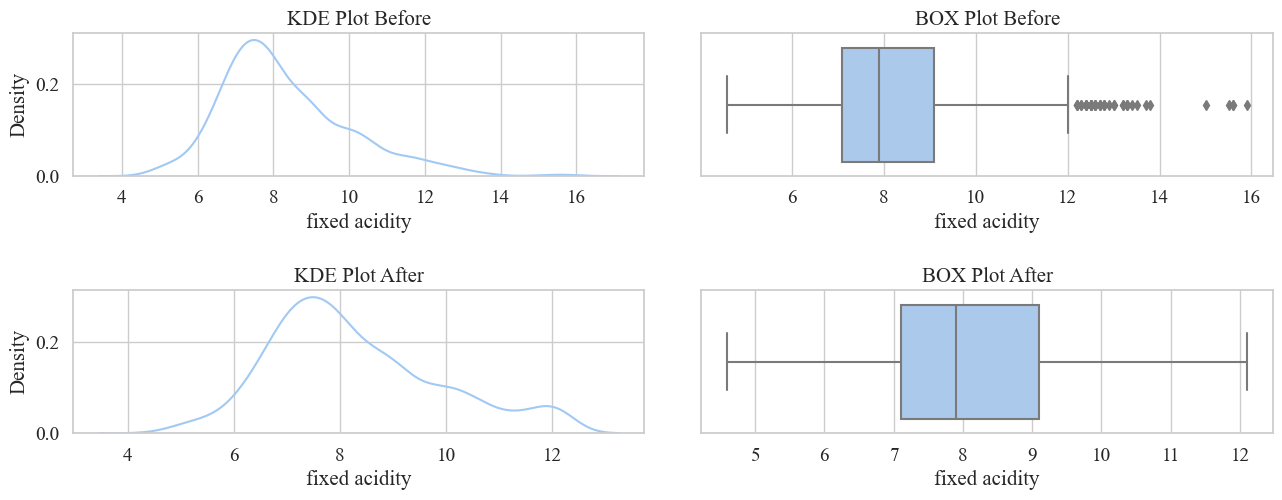






Outlier Detection for Feature : volatile acidity 

Minimum Value : 0.12 and Maximum Value : 1.33 

1st Quartile : 0.39 and 3rd Quartile : 0.64 

Lower Bound : 0.015 and Higher Bound : 1.015 

No. of Outliers below Lower Bound (0.015) are : 0
No. of Outliers above Upper Bound (1.015) are : 19
Total No. of Outliers are : 19 

Percentage of Outliers Records are : 1.4243 % 


No. of Outliers below Lower Bound (0.015) are : 0
No. of Outliers above Upper Bound (1.015) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


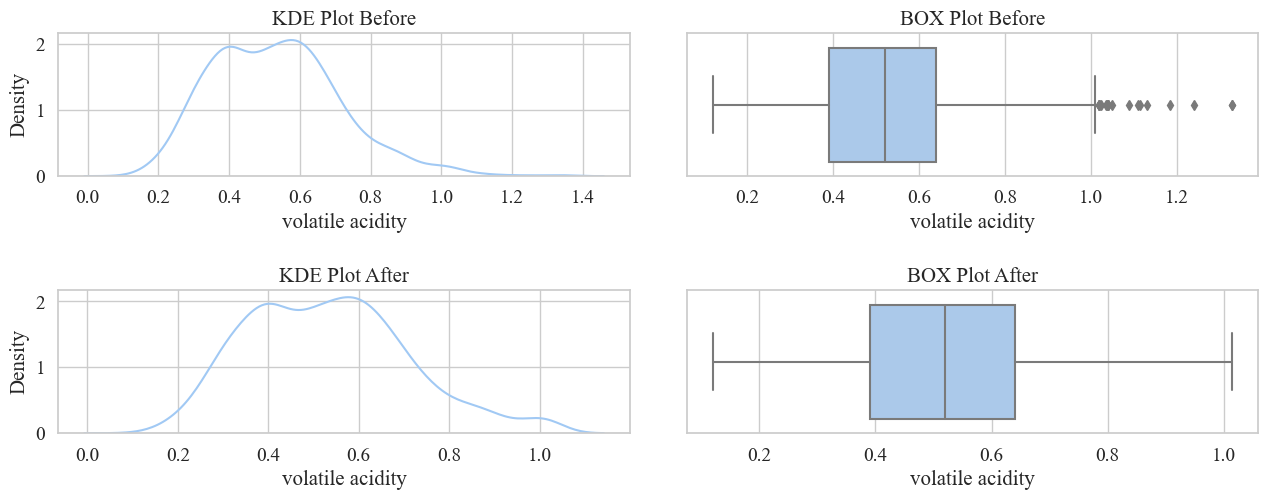






Outlier Detection for Feature : citric acid 

Minimum Value : 0.0 and Maximum Value : 1.0 

1st Quartile : 0.1 and 3rd Quartile : 0.42 

Lower Bound : -0.38 and Higher Bound : 0.9 

No. of Outliers below Lower Bound (-0.38) are : 0
No. of Outliers above Upper Bound (0.9) are : 1
Total No. of Outliers are : 1 

Percentage of Outliers Records are : 0.075 % 


No. of Outliers below Lower Bound (-0.38) are : 0
No. of Outliers above Upper Bound (0.9) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


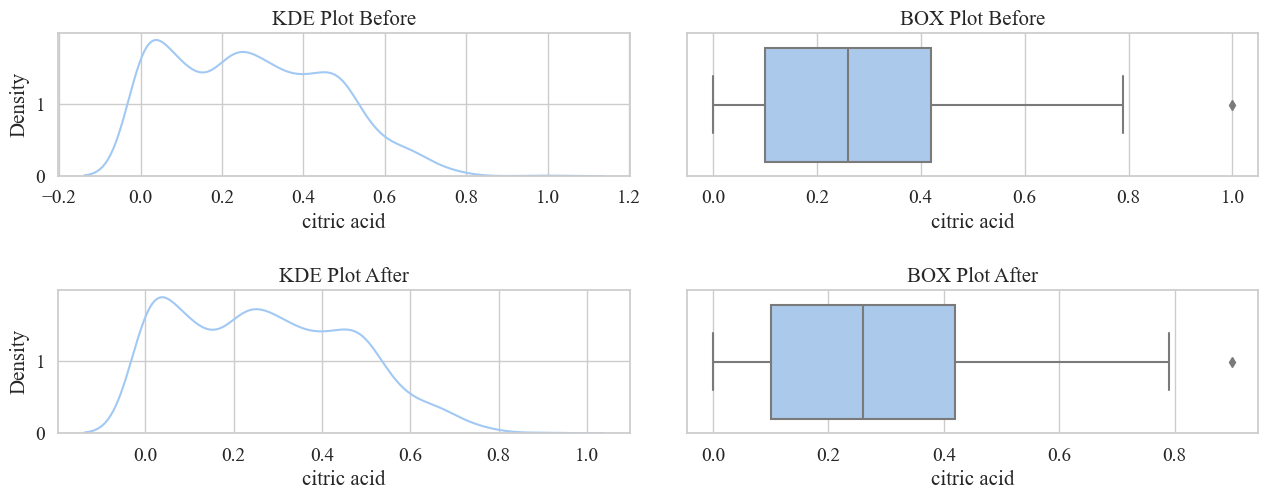






Outlier Detection for Feature : residual sugar 

Minimum Value : 0.9 and Maximum Value : 15.4 

1st Quartile : 1.9 and 3rd Quartile : 2.6 

Lower Bound : 0.85 and Higher Bound : 3.65 

No. of Outliers below Lower Bound (0.85) are : 0
No. of Outliers above Upper Bound (3.65) are : 120
Total No. of Outliers are : 120 

Percentage of Outliers Records are : 8.9955 % 


No. of Outliers below Lower Bound (0.85) are : 0
No. of Outliers above Upper Bound (3.65) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


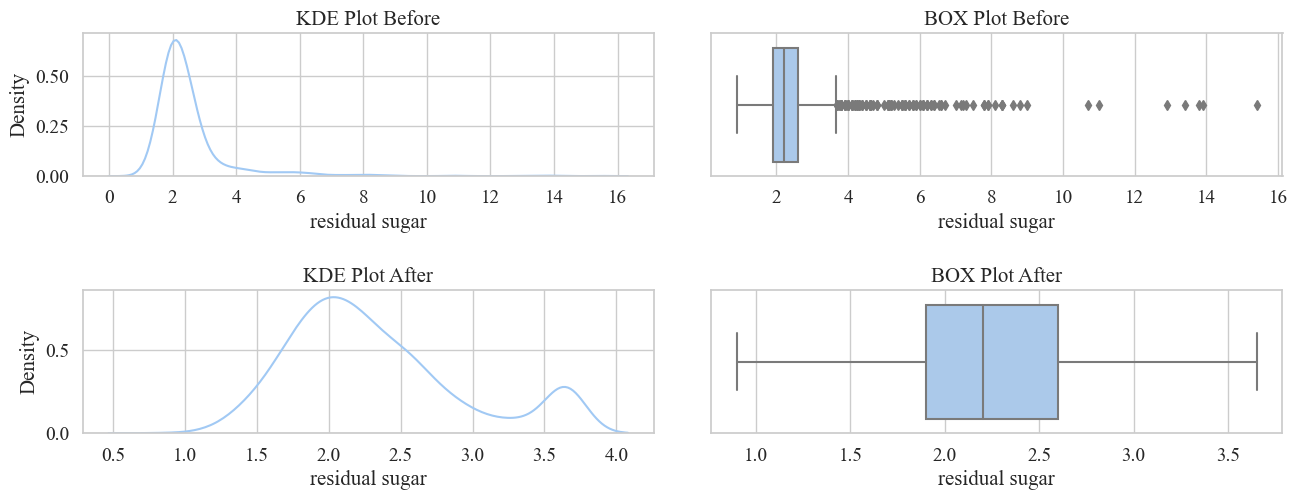






Outlier Detection for Feature : chlorides 

Minimum Value : 0.012 and Maximum Value : 0.611 

1st Quartile : 0.07 and 3rd Quartile : 0.091 

Lower Bound : 0.0385 and Higher Bound : 0.1225 

No. of Outliers below Lower Bound (0.0385) are : 4
No. of Outliers above Upper Bound (0.1225) are : 82
Total No. of Outliers are : 86 

Percentage of Outliers Records are : 6.4468 % 


No. of Outliers below Lower Bound (0.0385) are : 0
No. of Outliers above Upper Bound (0.1225) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


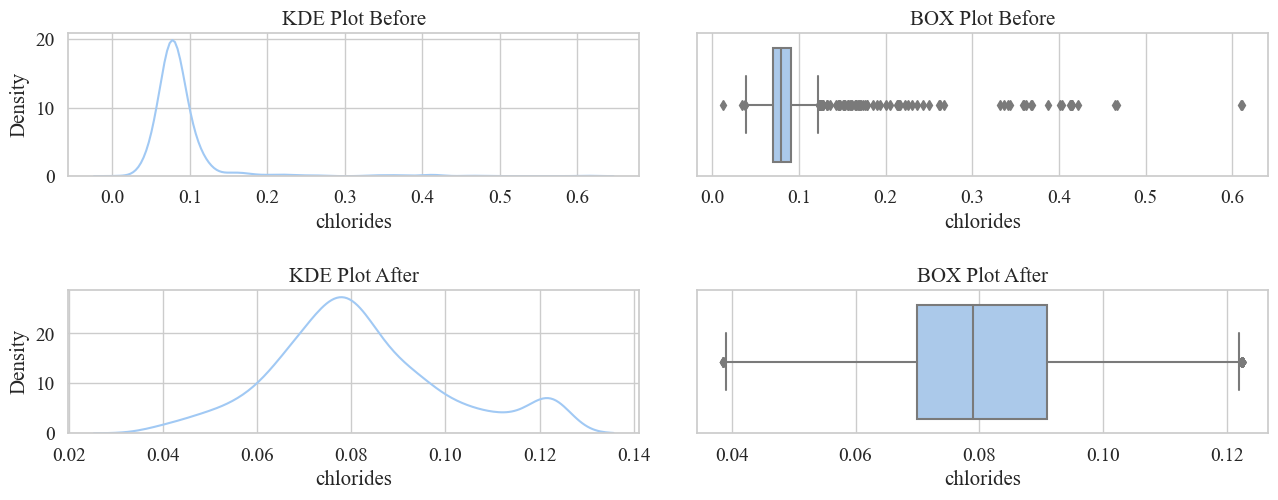






Outlier Detection for Feature : free sulfur dioxide 

Minimum Value : 1.0 and Maximum Value : 72.0 

1st Quartile : 7.0 and 3rd Quartile : 21.0 

Lower Bound : -14.0 and Higher Bound : 42.0 

No. of Outliers below Lower Bound (-14.0) are : 0
No. of Outliers above Upper Bound (42.0) are : 27
Total No. of Outliers are : 27 

Percentage of Outliers Records are : 2.024 % 


No. of Outliers below Lower Bound (-14.0) are : 0
No. of Outliers above Upper Bound (42.0) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


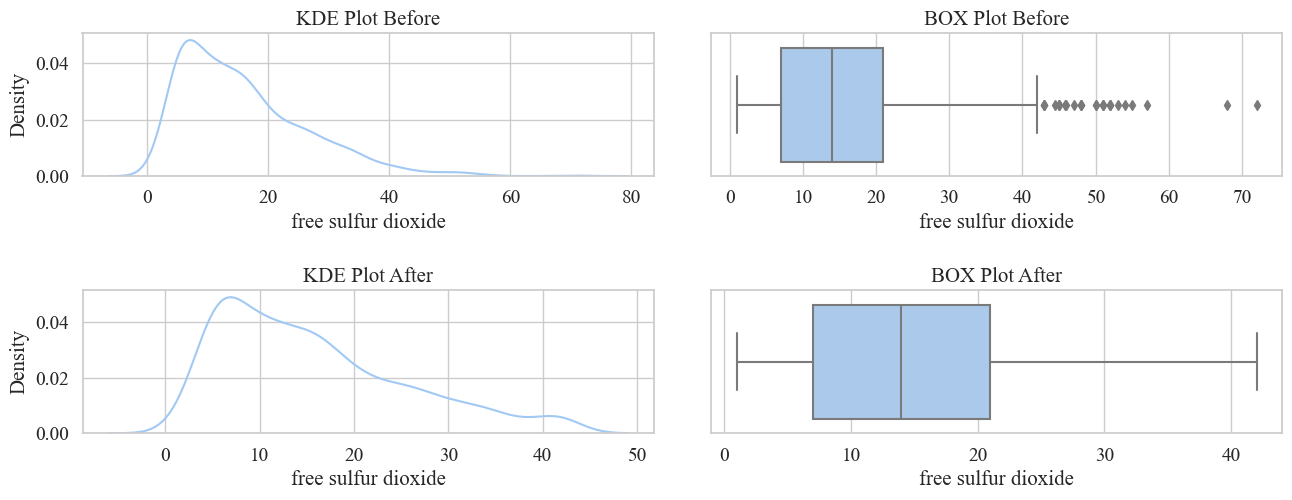






Outlier Detection for Feature : total sulfur dioxide 

Minimum Value : 6.0 and Maximum Value : 289.0 

1st Quartile : 22.0 and 3rd Quartile : 63.0 

Lower Bound : -39.5 and Higher Bound : 124.5 

No. of Outliers below Lower Bound (-39.5) are : 0
No. of Outliers above Upper Bound (124.5) are : 48
Total No. of Outliers are : 48 

Percentage of Outliers Records are : 3.5982 % 


No. of Outliers below Lower Bound (-39.5) are : 0
No. of Outliers above Upper Bound (124.5) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


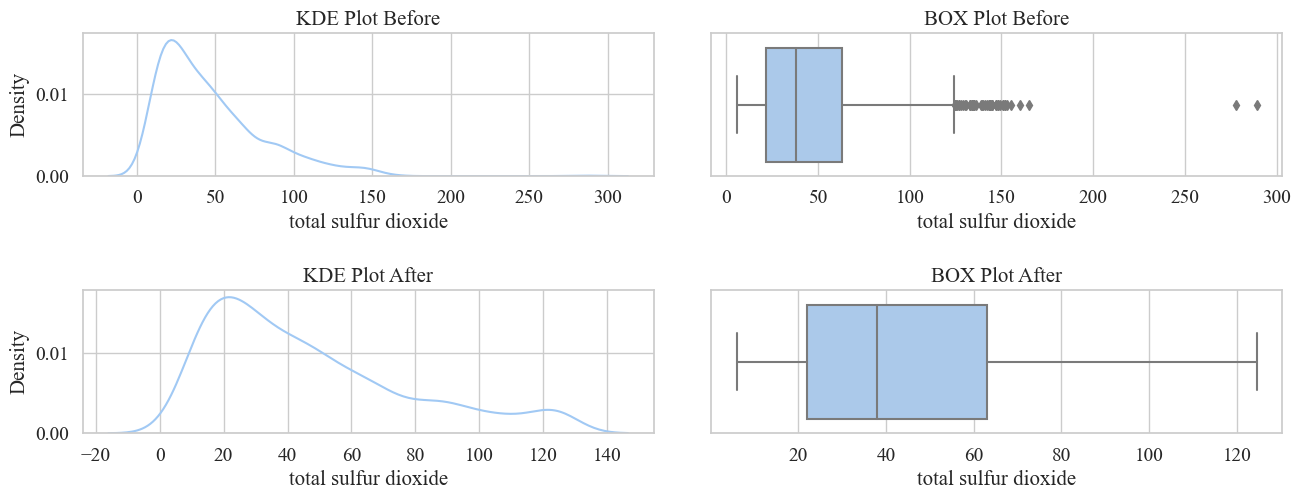






Outlier Detection for Feature : density 

Minimum Value : 0.99007 and Maximum Value : 1.00369 

1st Quartile : 0.99566 and 3rd Quartile : 0.99782 

Lower Bound : 0.9924 and Higher Bound : 1.0011 

No. of Outliers below Lower Bound (0.9924) are : 20
No. of Outliers above Upper Bound (1.0011) are : 15
Total No. of Outliers are : 35 

Percentage of Outliers Records are : 2.6237 % 


No. of Outliers below Lower Bound (0.9924) are : 0
No. of Outliers above Upper Bound (1.0011) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


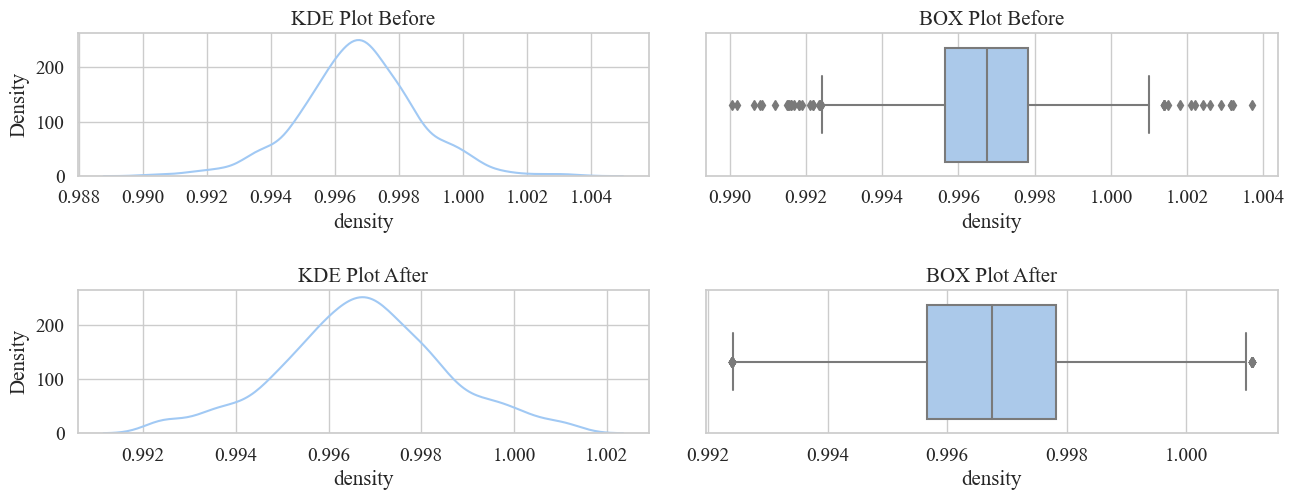






Outlier Detection for Feature : pH 

Minimum Value : 2.74 and Maximum Value : 4.01 

1st Quartile : 3.21 and 3rd Quartile : 3.4 

Lower Bound : 2.925 and Higher Bound : 3.685 

No. of Outliers below Lower Bound (2.925) are : 10
No. of Outliers above Upper Bound (3.685) are : 15
Total No. of Outliers are : 25 

Percentage of Outliers Records are : 1.8741 % 


No. of Outliers below Lower Bound (2.925) are : 0
No. of Outliers above Upper Bound (3.685) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


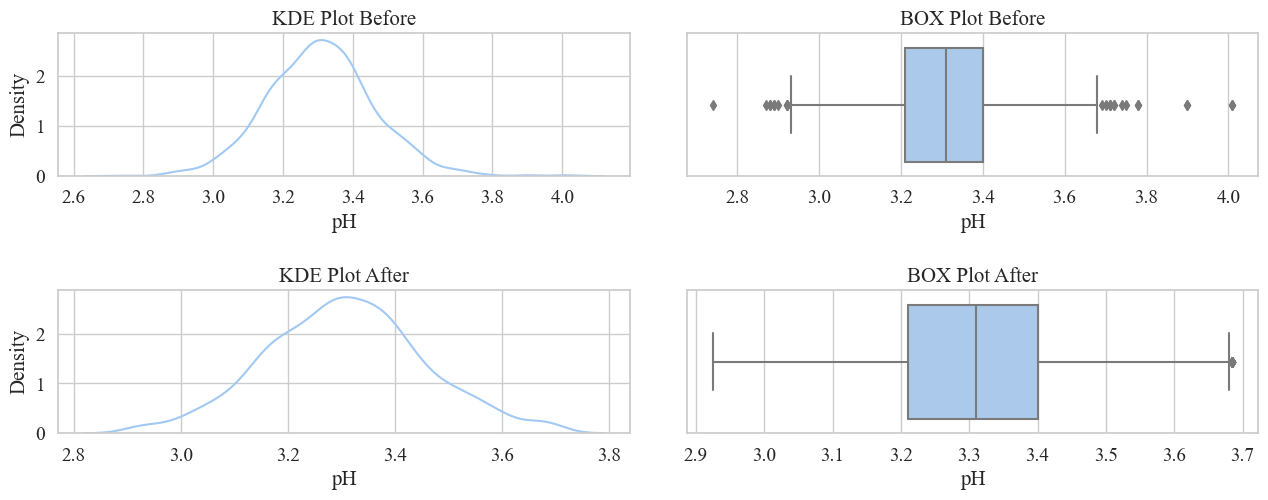






Outlier Detection for Feature : sulphates 

Minimum Value : 0.33 and Maximum Value : 2.0 

1st Quartile : 0.55 and 3rd Quartile : 0.7282161881508497 

Lower Bound : 0.2827 and Higher Bound : 0.9955 

No. of Outliers below Lower Bound (0.2827) are : 0
No. of Outliers above Upper Bound (0.9955) are : 56
Total No. of Outliers are : 56 

Percentage of Outliers Records are : 4.1979 % 


No. of Outliers below Lower Bound (0.2827) are : 0
No. of Outliers above Upper Bound (0.9955) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


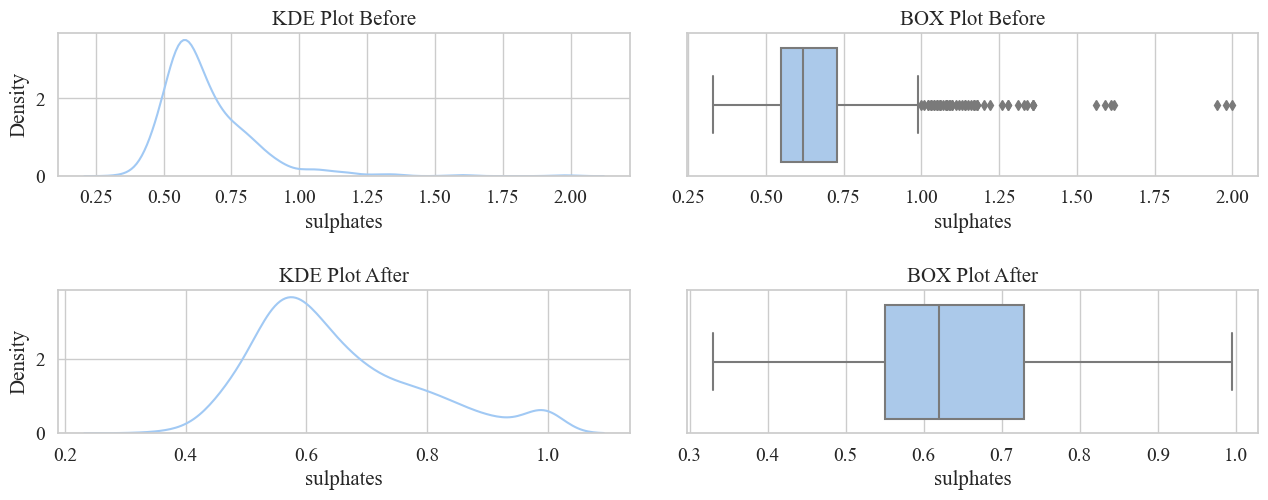






Outlier Detection for Feature : alcohol 

Minimum Value : 8.4 and Maximum Value : 14.9 

1st Quartile : 9.5 and 3rd Quartile : 11.091666666666676 

Lower Bound : 7.1125 and Higher Bound : 13.4792 

No. of Outliers below Lower Bound (7.1125) are : 0
No. of Outliers above Upper Bound (13.4792) are : 13
Total No. of Outliers are : 13 

Percentage of Outliers Records are : 0.9745 % 


No. of Outliers below Lower Bound (7.1125) are : 0
No. of Outliers above Upper Bound (13.4792) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


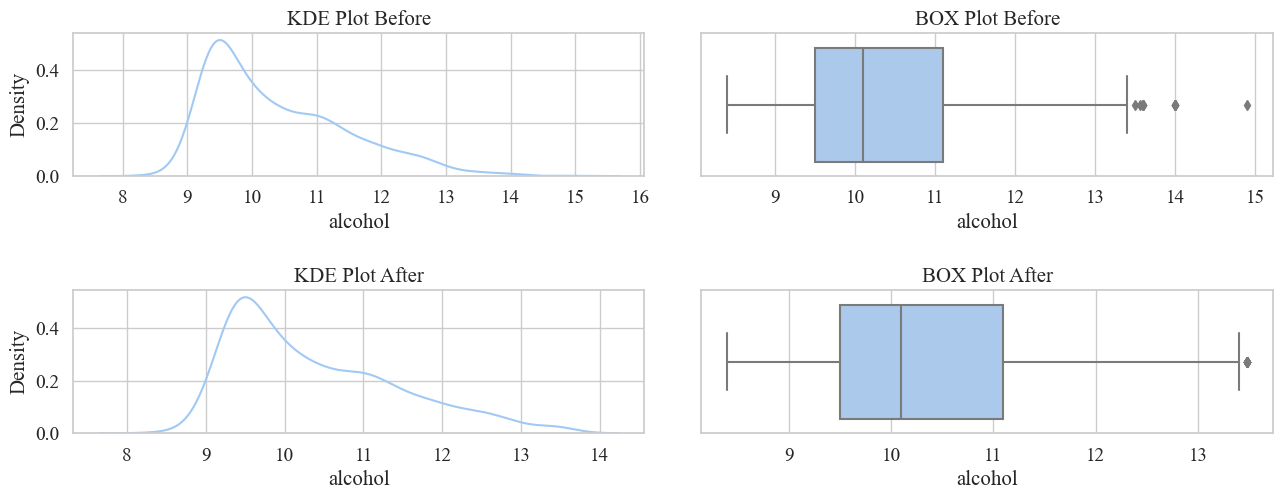

In [23]:
Xtr_out = outliers_detect_handle(Xtr_out)

In [24]:
Xtr_out.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000,1334.0000
mean,8.2730,0.5315,0.2708,2.3169,0.0816,15.7038,46.4073,0.9967,3.3074,0.6492,10.3868
std,1.6044,0.1780,0.1941,0.6053,0.0185,9.8955,31.0673,0.0018,0.1487,0.1375,1.0656
min,4.6000,0.1200,0.0000,0.9000,0.0385,1.0000,6.0000,0.9924,2.9250,0.3300,8.4000
25%,7.1000,0.3900,0.1000,1.9000,0.0700,7.0000,22.0000,0.9957,3.2100,0.5500,9.5000
50%,7.9000,0.5200,0.2600,2.2000,0.0790,13.9720,38.0000,0.9968,3.3100,0.6200,10.1000
75%,9.1000,0.6400,0.4200,2.6000,0.0910,21.0000,63.0000,0.9978,3.4000,0.7282,11.0917
max,12.1000,1.0150,0.9000,3.6500,0.1225,42.0000,124.5000,1.0011,3.6850,0.9955,13.4792


In [25]:
### Train dataframe after outlier detection and handling operation, using Xtr_out and ytrain (after balancing)

dftr = pd.concat([Xtr_out,ytr], axis=1)
dftr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.670,0.02,1.9,0.061,26.0,42.0,0.9949,3.39,0.82,10.9,1
1,8.8,0.955,0.05,1.8,0.075,5.0,19.0,0.9962,3.30,0.44,9.6,0
2,7.1,0.680,0.00,2.3,0.087,17.0,26.0,0.9978,3.45,0.53,9.5,0
3,11.9,0.390,0.69,2.8,0.095,17.0,35.0,0.9994,3.10,0.61,10.8,1
4,7.1,0.220,0.49,1.8,0.039,8.0,18.0,0.9934,3.39,0.56,12.4,1


In [26]:
dftr.shape

(1334, 12)

##### Saving Production Train CSV File and Pickle Files, after outlier detection and handling step

In [27]:
print('Writing the dataframes after outlier detection and handling to CSV and PKL files ... \n')

dftr.to_csv('wine_quality_FE_prod_train.csv', index=False)
dftr.to_pickle('wine_quality_FE_prod_train.pkl')

print('Files Saved Successfully ...')

Writing the dataframes after outlier detection and handling to CSV and PKL files ... 

Files Saved Successfully ...


### 3.4 Feature Transformation (to be applied in the model pipeline)

#### 3.4.1 Checking transformations on numerical features

In [28]:
from scipy import stats as sts

In [29]:
def trans_skew_kurt(df, fea):
    print(f'Skew: {round(df[fea].skew(),4)} and Kurt {round(df[fea].kurt(),4)}, Before Transformation for "{fea}" \n')
    print(f'Skew and Kurt After Transformation for "{fea}"')
   
    ops = []
    skw_aft = []
    krt_aft = []
    
    dft = df.copy()
    dft[fea] = np.log(dft[fea]+1)                # Log
    ops.append('Log')
    skw_aft.append(round(dft[fea].skew(),4))
    krt_aft.append(round(dft[fea].kurt(),4))
    
    dft = df.copy()
    dft[fea] = dft[fea]**2                       # Square
    ops.append('Square')
    skw_aft.append(round(dft[fea].skew(),4))
    krt_aft.append(round(dft[fea].kurt(),4))
    
    
    dft = df.copy()
    dft[fea] = 1/(dft[fea]+1)                    # Reciprocal
    ops.append('Reciprocal')
    skw_aft.append(round(dft[fea].skew(),4))
    krt_aft.append(round(dft[fea].kurt(),4))
    
    
    dft = df.copy()
    dft[fea] = dft[fea]**(1/2)                   # Square Root
    ops.append('SQRT')
    skw_aft.append(round(dft[fea].skew(),4))
    krt_aft.append(round(dft[fea].kurt(),4))
    
   
    dft = df.copy()
    dft[fea] = dft[fea]**(1/1.2)                 # Exponential
    ops.append('Exponential')
    skw_aft.append(round(dft[fea].skew(),4))
    krt_aft.append(round(dft[fea].kurt(),4))
    
    # print(f'Transformation : Box-Cox')           # Box-Cox
    # dft = df.copy()
    # dft[fea], l = sts.boxcox(dft[fea])
    # print(f'Lambda : {round(l,4)}')
    # shape_check_comp(df, dft, fea)

    
    dft = df.copy()
    dft[fea], l = sts.yeojohnson(dft[fea])
    ops.append('Yeo-Johnson')
    skw_aft.append(round(dft[fea].skew(),4))
    krt_aft.append(round(dft[fea].kurt(),4))
    
    sk_kr = pd.DataFrame({'Operation':ops,'Skew':skw_aft,'Kurtosis':krt_aft})
    print(sk_kr.sort_values(by=['Skew'], ascending=True))

In [30]:
def shape_check_comp(df, dft, fea):

    plt.figure(figsize=(20,8))
    plt.subplot(2,2,1)
    plt.title('KDE Plot "Before"')
    sb.kdeplot(data=df, x=fea)
    
    plt.subplot(2,2,2)
    plt.title('KDE Plot "After"')
    sb.kdeplot(data=dft, x=fea)
    
    plt.subplot(2,2,3)
    plt.title('QQ-Plot "Before"')
    sts.probplot(df[fea], dist='norm', plot=plt)   # fit=True                   ## QQ-PLOT to check 'normality'
    
    plt.subplot(2,2,4)
    plt.title('QQ-Plot "After"')
    sts.probplot(dft[fea], dist='norm', plot=plt)   # fit=True                   ## QQ-PLOT to check 'normality'

    
    # plt.title('Box Plot')
    # sb.boxplot(data=df, x=fea)

    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.8)
    
    plt.show()

    print('\n')

In [31]:
def shape_check_all_trans(df, fea):
    
    print(f'Feature Name : {fea} \n')

    print(f'Transformation : Log')
    dft = df.copy()
    dft[fea] = np.log(dft[fea]+1)                # Log
    shape_check_comp(df, dft, fea)       
    
    print(f'Transformation : Square')
    dft = df.copy()
    dft[fea] = dft[fea]**2                       # Square
    shape_check_comp(df, dft, fea)
    
    print(f'Transformation : Reciprocal')
    dft = df.copy()
    dft[fea] = 1/(dft[fea]+1)                    # Reciprocal
    shape_check_comp(df, dft, fea)
    
    print(f'Transformation : Square Root')
    dft = df.copy()
    dft[fea] = dft[fea]**(1/2)                   # Square Root
    shape_check_comp(df, dft, fea)
    
    print(f'Transformation : Exponential')
    dft = df.copy()
    dft[fea] = dft[fea]**(1/1.2)                 # Exponential
    shape_check_comp(df, dft, fea)
    
    # print(f'Transformation : Box-Cox')           # Box-Cox
    # dft = df.copy()
    # dft[fea], l = sts.boxcox(dft[fea])
    # print(f'Lambda : {round(l,4)}')
    # shape_check_comp(df, dft, fea)

    print(f'Transformation : Yeo-Johnson')      # Yeo-Johnson
    dft = df.copy()
    dft[fea], l = sts.yeojohnson(dft[fea])
    print(f'Lambda : {round(l,4)}')
    shape_check_comp(df, dft, fea)

In [32]:
fea_num

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [33]:
trans_skew_kurt(Xtr_out,'alcohol')

Skew: 0.8602 and Kurt -0.0492, Before Transformation for "alcohol" 

Skew and Kurt After Transformation for "alcohol"
     Operation    Skew  Kurtosis
2   Reciprocal -0.5566   -0.6447
5  Yeo-Johnson  0.0000   -1.0003
0          Log  0.7038   -0.3886
3         SQRT  0.7736   -0.2451
4  Exponential  0.8310   -0.1175
1       Square  1.0425    0.4286


Feature Name : alcohol 

Transformation : Log


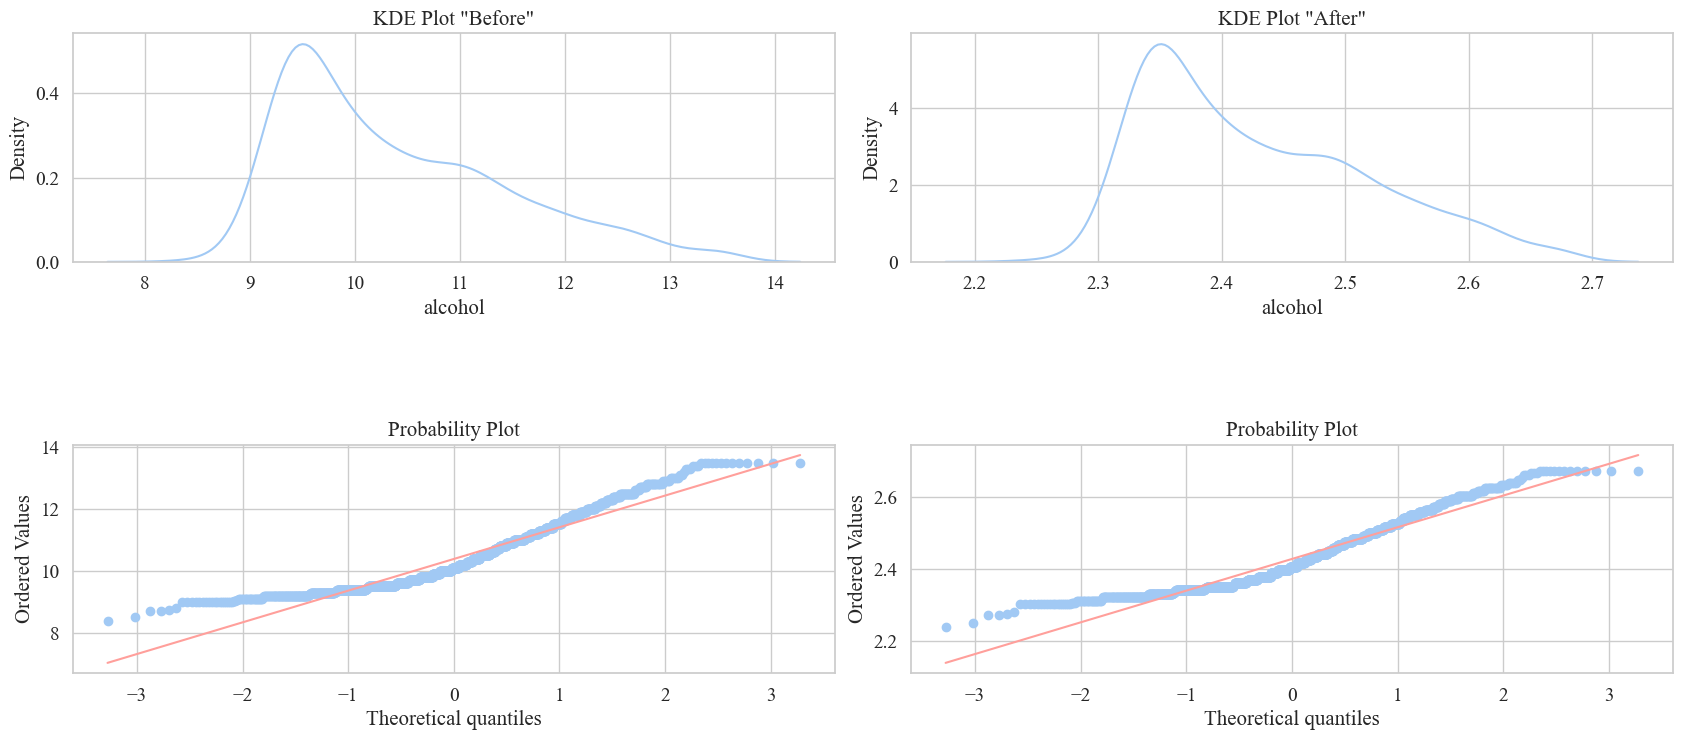



Transformation : Square


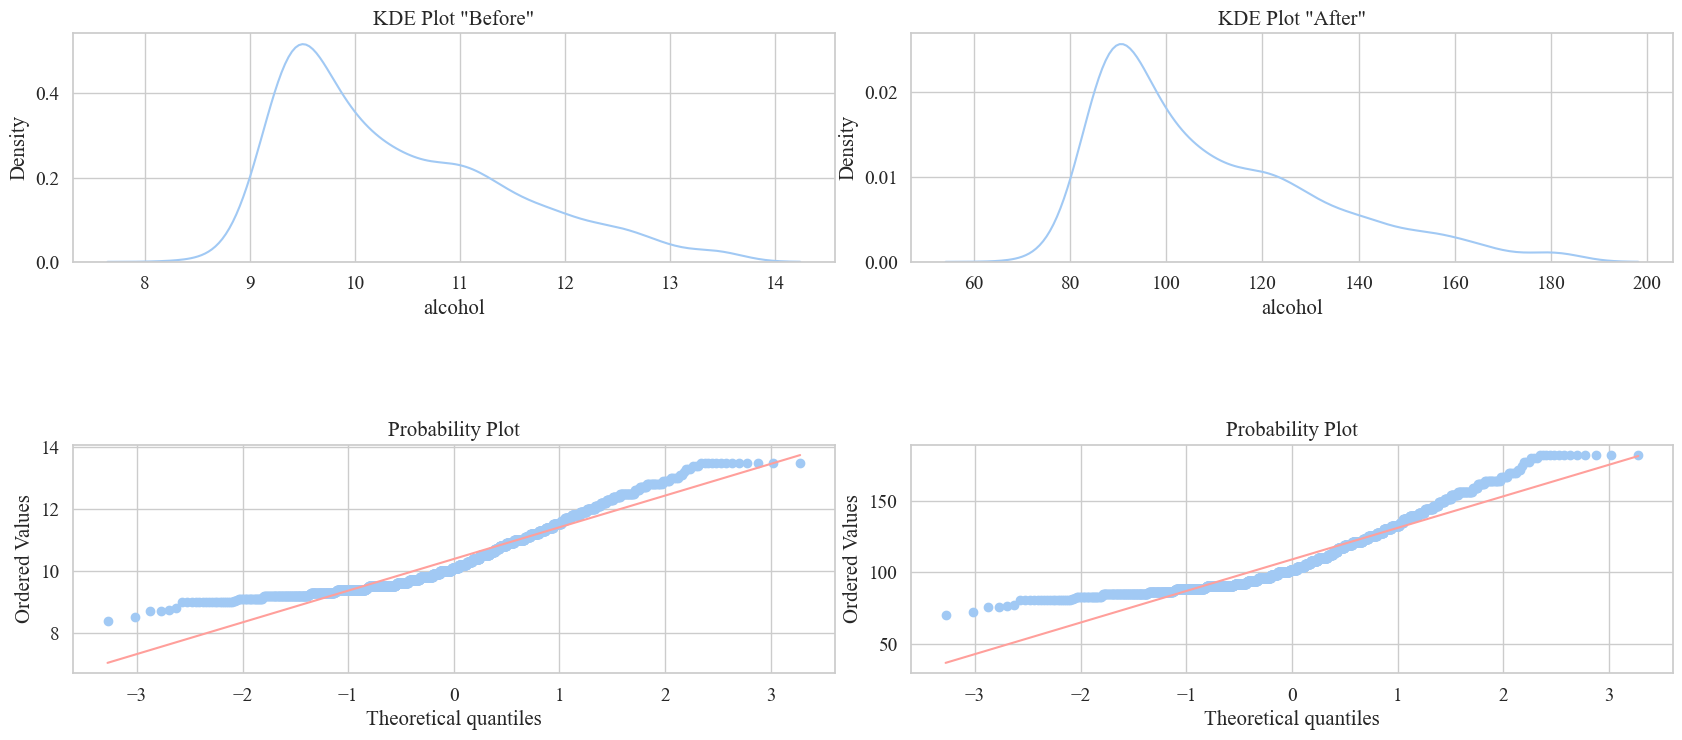



Transformation : Reciprocal


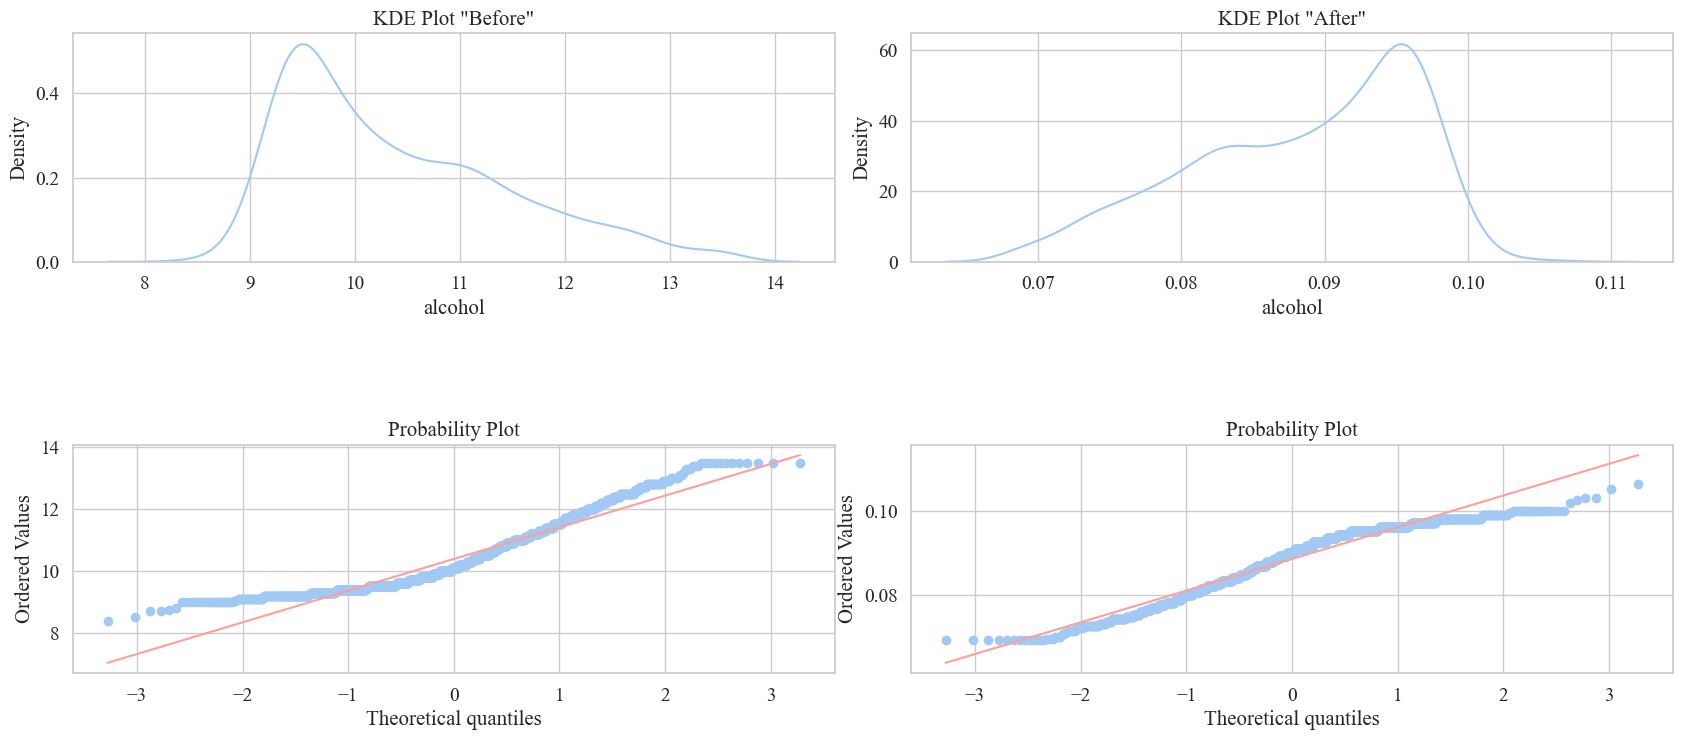



Transformation : Square Root


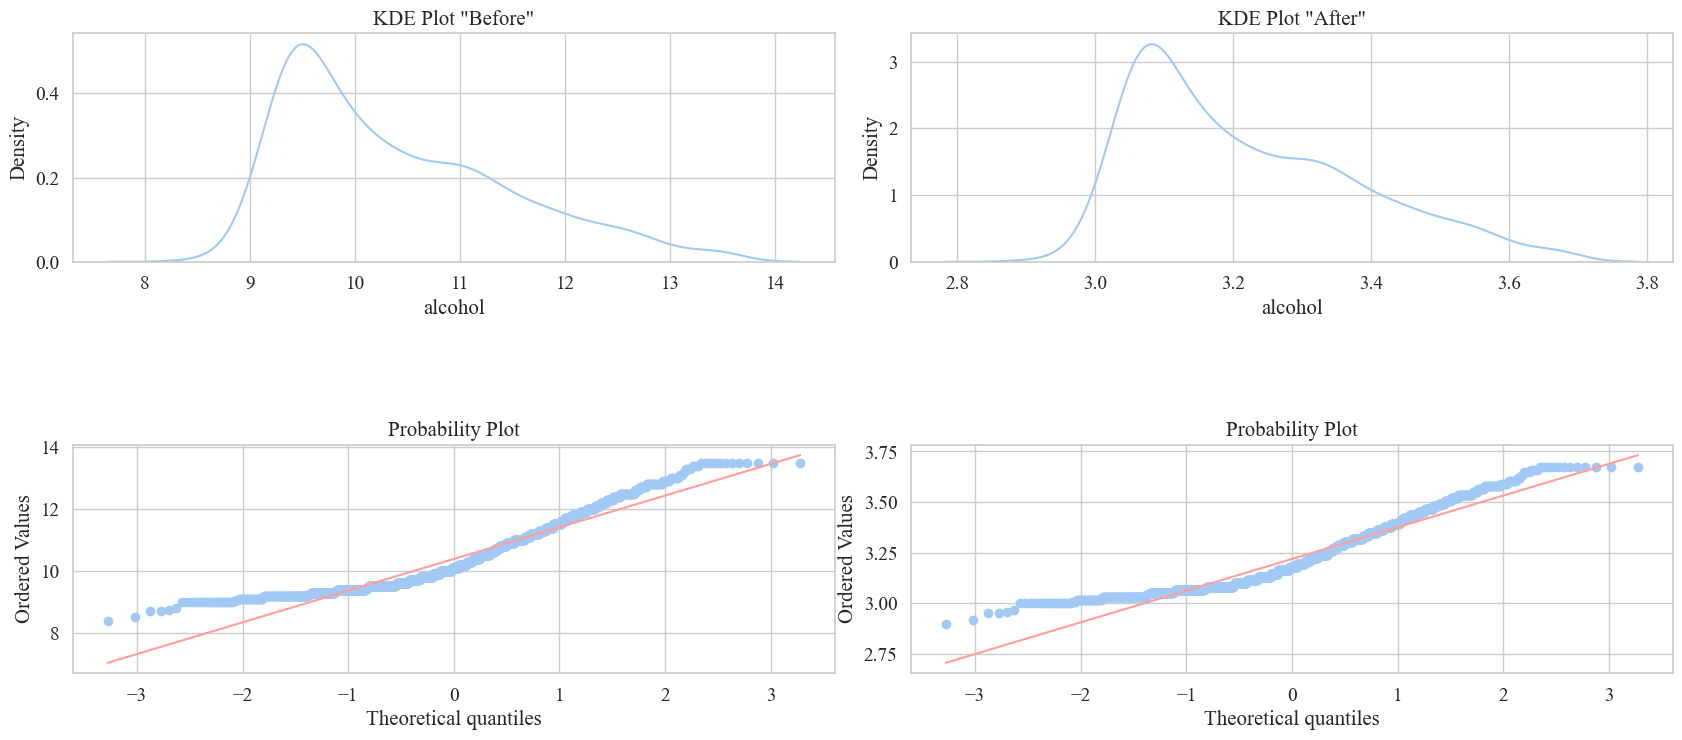



Transformation : Exponential


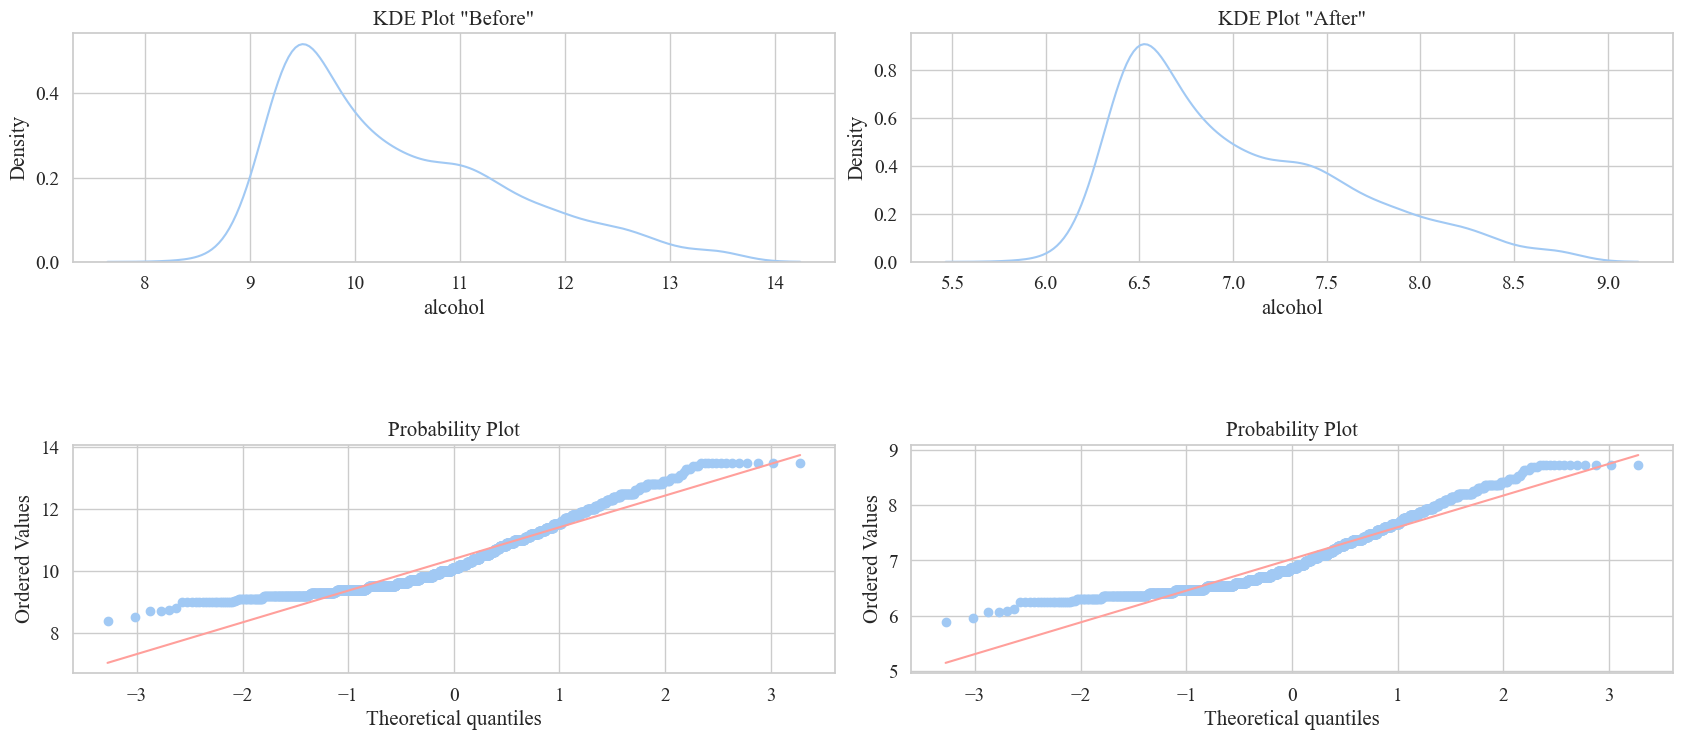



Transformation : Yeo-Johnson
Lambda : -4.1564


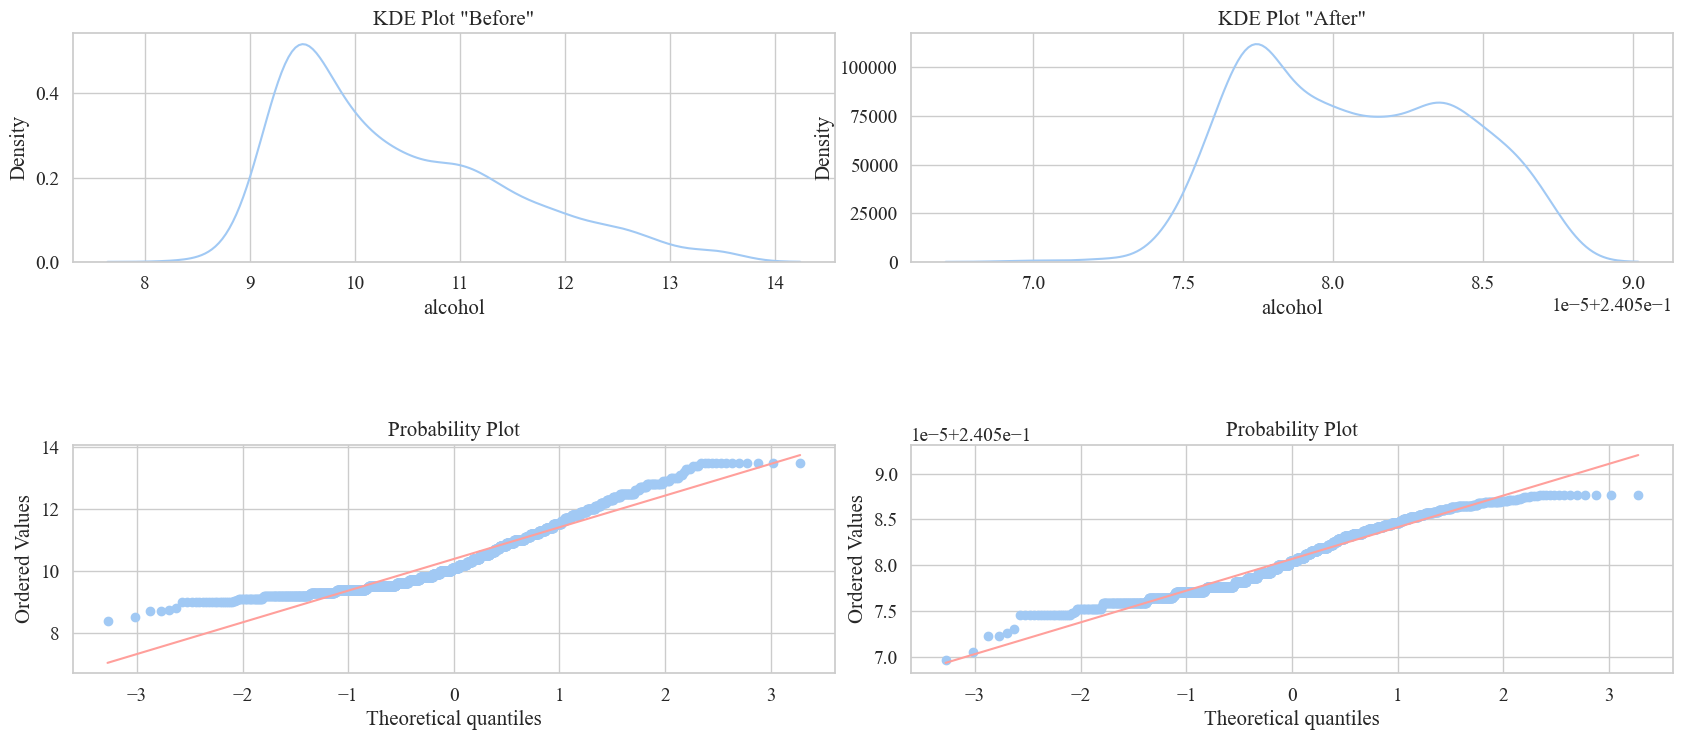

In [34]:
shape_check_all_trans(Xtr_out,'alcohol')

#### 3.4.2 Applying transfromations on numerical features

In [35]:
pt_yj = PowerTransformer(method='yeo-johnson', standardize=False)

Xtr_pt_yj = pt_yj.fit_transform(Xtr_out)   ## np.array as output

print(Xtr_pt_yj.shape)
print(Xtr_pt_yj[0:5])

(1334, 11)
[[ 1.24441913e+00  4.39055786e-01  1.97426519e-02  6.49611539e-01
   4.64465762e-02  3.97208049e+00  4.36818541e+00  1.97668405e+01
   1.81605797e+00  2.57080117e-01  2.40583133e-01]
 [ 1.32071328e+00  5.48142098e-01  4.84271629e-02  6.37544249e-01
   5.39149021e-02  1.98040974e+00  3.37290666e+00  1.98580993e+01
   1.78533285e+00  2.09776436e-01  2.40578105e-01]
 [ 1.26126371e+00  4.43386920e-01 -0.00000000e+00  6.90502912e-01
   5.96157689e-02  3.40235116e+00  3.75607364e+00  1.99786491e+01
   1.83628626e+00  2.25796178e-01  2.40577575e-01]
 [ 1.39651377e+00  2.97757605e-01  4.84706214e-01  7.29409052e-01
   6.30949804e-02  3.40235116e+00  4.13185938e+00  2.00925503e+01
   1.71533132e+00  2.36947043e-01  2.40582842e-01]
 [ 1.26126371e+00  1.87041120e-01  3.75368934e-01  6.37544249e-01
   3.26237230e-02  2.48532179e+00  3.30830551e+00  1.96630859e+01
   1.81605797e+00  2.30272158e-01  2.40586305e-01]]


### 3.5 Multi-Collinearity Check

In [36]:
mc_cols = ['density','pH','alcohol','chlorides','fixed acidity','sulphates','residual sugar']  # multi-collinear columns
# ['free sulfur dioxide','total sulfur dioxide','volatile acidity','citric acid']

Xmul = Xtr_out.drop(columns=mc_cols)
Xmul.head()

,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide
0,0.670,0.02,26.0,42.0
1,0.955,0.05,5.0,19.0
2,0.680,0.00,17.0,26.0
3,0.390,0.69,17.0,35.0
4,0.220,0.49,8.0,18.0


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()

vif_df['Feature'] = Xmul.columns
vif_df['VIF Value'] = [variance_inflation_factor(Xmul.values,i) for i in range(Xmul.shape[1])]

vif_df = vif_df.sort_values(['VIF Value'], ascending=False)

vif_df

,Feature,VIF Value
3,total sulfur dioxide,6.4445
2,free sulfur dioxide,6.2271
0,volatile acidity,3.2334
1,citric acid,2.0651


<Figure size 2000x400 with 0 Axes>

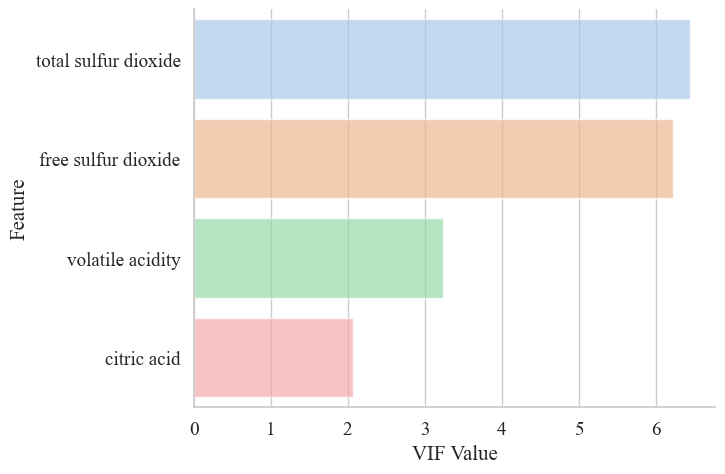

In [38]:
plt.figure(figsize=(20,4))
sb.catplot(data=vif_df, x='VIF Value', y='Feature', kind='bar', aspect=1.5, alpha=0.7)
plt.show()

### 3.6 Scaling (StandardScaler) (to be applied in model pipeline)

In [39]:
ss = StandardScaler()

Xtr_scl_trans = ss.fit_transform(Xtr_pt_yj)   ## np.array as output

print(f'Standard Scaler Mean : {ss.mean_} \n')

print(Xtr_scl_trans.shape)
print(Xtr_scl_trans[0:5])

Standard Scaler Mean : [ 1.29733457  0.36618353  0.21702832  0.68279099  0.05643873  3.08492398
  4.23040021 19.89968391  1.78724741  0.23897937  0.24058066] 

(1334, 11)
[[-1.02404558  0.82689556 -1.3937645  -0.64712806 -1.16288854  1.08073659
   0.15305733 -1.04809555  0.56416257  1.24917808  0.70322369]
 [ 0.45243619  2.064719   -1.19111697 -0.88248706 -0.29372326 -1.34552238
  -0.95253828 -0.32809043 -0.03749042 -2.01536766 -0.7267279 ]
 [-0.69806113  0.87604178 -1.53324045  0.15041242  0.36974477  0.3866907
  -0.52690101  0.6230117   0.96026867 -0.90980509 -0.87725564]
 [ 1.91936453 -0.77644216  1.89106463  0.90923314  0.77465611  0.3866907
  -0.10946312  1.52165875 -1.40824591 -0.14025591  0.62054717]
 [-0.69806113 -2.03276348  1.1186293  -0.88248706 -2.77159498 -0.73043709
  -1.02429984 -1.86668861  0.56416257 -0.60090649  1.60524815]]


### 3.7 Feature Selection (to be applied in model pipeline)

In [40]:
skb = SelectKBest(mutual_info_classif, k=8)
Xtr_trans = skb.fit_transform(Xtr_scl_trans, ytr)

print(skb.get_support())
print(skb.scores_)
print(Xtr_trans.shape)
print(Xtr_trans[0:5])

[ True  True  True False  True False  True  True False  True  True]
[0.01902285 0.05829315 0.04730697 0.00634084 0.0198962  0.
 0.0601075  0.03880514 0.01462443 0.0946527  0.15112891]
(1334, 8)
[[-1.02404558  0.82689556 -1.3937645  -1.16288854  0.15305733 -1.04809555
   1.24917808  0.70322369]
 [ 0.45243619  2.064719   -1.19111697 -0.29372326 -0.95253828 -0.32809043
  -2.01536766 -0.7267279 ]
 [-0.69806113  0.87604178 -1.53324045  0.36974477 -0.52690101  0.6230117
  -0.90980509 -0.87725564]
 [ 1.91936453 -0.77644216  1.89106463  0.77465611 -0.10946312  1.52165875
  -0.14025591  0.62054717]
 [-0.69806113 -2.03276348  1.1186293  -2.77159498 -1.02429984 -1.86668861
  -0.60090649  1.60524815]]
